In [2]:
import os, shutil
import tensorflow as tf
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Loading Data

In [3]:
# You need to specify where's your project directory
pdir = '/Users/Lucas/Desktop/IML/Projet_IML_Robot/'

# The directory where you uncompressed the dogs vs cats dataset
# Yours will be different
original_dataset_dir = '/Users/Lucas/Desktop/IML/kaggle_dataset_dogs_vs_cats_uncompressed/train'

### Creating directories

In [4]:
# Directory where you'll store your smaller dataset
base_dir = pdir+'data'
if (os.path.exists(pdir+'data'))==False:
    os.mkdir(base_dir)

# Data / Train
train_dir = os.path.join(base_dir, 'train')
if (os.path.exists(pdir+'data/train'))==False:
    os.mkdir(train_dir)

# Data / Validation
validation_dir = os.path.join(base_dir, 'validation')
if (os.path.exists(pdir+'data/validation'))==False:
    os.mkdir(validation_dir)

# Data / Test
test_dir = os.path.join(base_dir, 'test')
if (os.path.exists(pdir+'data/test'))==False:
    os.mkdir(test_dir)

# Data / Train / Cats
train_cats_dir = os.path.join(train_dir, 'cats')
if (os.path.exists(pdir+'data/train/cats'))==False:
    os.mkdir(train_cats_dir)

# # Data / Train / Dogs
train_dogs_dir = os.path.join(train_dir, 'dogs')
if (os.path.exists(pdir+'data/train/dogs'))==False:
    os.mkdir(train_dogs_dir)

# Data / Validation / Cats
validation_cats_dir = os.path.join(validation_dir, 'cats')
if (os.path.exists(pdir+'data/validation/cats'))==False:
    os.mkdir(validation_cats_dir)

# Data / Validation / Dogs  
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if (os.path.exists(pdir+'data/validation/dogs'))==False:
    os.mkdir(validation_dogs_dir)

# Data / Test / Cats    
test_cats_dir = os.path.join(test_dir, 'cats')
if (os.path.exists(pdir+'data/test/cats'))==False:
    os.mkdir(test_cats_dir)

# Data / Test / Dogs   
test_dogs_dir = os.path.join(test_dir, 'dogs')
if (os.path.exists(pdir+'data/test/dogs'))==False:
    os.mkdir(test_dogs_dir)

### Copying images to training, validation, and test directories

In [5]:
# Copy the first 1000 cat images to train_cats_dir
if (os.path.exists(pdir+'data/train/cats/cat.1.jpg'))==False:
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_cats_dir, fname)
        shutil.copyfile(src, dst)
print('total training cat images :', len(os.listdir(train_cats_dir)))


# Copy the next 500 cat images to validation_cats_dir
if (os.path.exists(pdir+'data/validation/cats/cat.1000.jpg'))==False:
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_cats_dir, fname)
        shutil.copyfile(src, dst)
print('total validation cat images :', len(os.listdir(validation_cats_dir)))


# Copy the next 500 cat images to test_cats_dir
if (os.path.exists(pdir+'data/test/cats/cat.1500.jpg'))==False:
    fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_cats_dir, fname)
        shutil.copyfile(src, dst)
print('total test cat images :', len(os.listdir(test_cats_dir)))


# Copy the first 1000 dog images to train_dogs_dir
if (os.path.exists(pdir+'data/train/dogs/cat.1.jpg'))==False:
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_dogs_dir, fname)
        shutil.copyfile(src, dst)
print('total training dog images :', len(os.listdir(train_dogs_dir)))


# Copy the next 500 dog images to validation_dogs_dir
if (os.path.exists(pdir+'data/validation/dogs/cat.1000.jpg'))==False:
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_dogs_dir, fname)
        shutil.copyfile(src, dst)
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))

    
# Copy the next 500 dog images to test_dogs_dir
if (os.path.exists(pdir+'data/test/dogs/cat.1500.jpg'))==False:
    fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_dogs_dir, fname)
        shutil.copyfile(src, dst)
print('total test dog images :', len(os.listdir(test_dogs_dir)))

total training cat images : 1000
total validation cat images : 500
total test cat images : 500
total training dog images : 1000
total validation dog images : 500
total test dog images : 500


# Data Preprocessing

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Instantiating a Convnet

In [16]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

# We ended the network with a single sigmoid unit, so we'll use binary crossentropy as the loss
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

### Configuring the model for training

### Fitting the model

In [17]:
# Fit the model using the generator
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)


Epoch 1/30
100/100 [==============================] - 11s 114ms/step - loss: 0.6949 - acc: 0.5015 - val_loss: 0.6841 - val_acc: 0.5670
Epoch 2/30
100/100 [==============================] - 11s 112ms/step - loss: 0.6835 - acc: 0.5640 - val_loss: 0.6889 - val_acc: 0.5140
Epoch 3/30
100/100 [==============================] - 11s 114ms/step - loss: 0.6686 - acc: 0.5900 - val_loss: 0.6401 - val_acc: 0.6320
Epoch 4/30
100/100 [==============================] - 11s 114ms/step - loss: 0.6514 - acc: 0.6050 - val_loss: 0.6159 - val_acc: 0.6620
Epoch 5/30
100/100 [==============================] - 11s 113ms/step - loss: 0.6301 - acc: 0.6290 - val_loss: 0.6051 - val_acc: 0.6760
Epoch 6/30
100/100 [==============================] - 11s 112ms/step - loss: 0.6265 - acc: 0.6330 - val_loss: 0.5781 - val_acc: 0.7050
Epoch 7/30
100/100 [==============================] - 11s 112ms/step - loss: 0.6067 - acc: 0.6615 - val_loss: 0.5722 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 1

In [19]:
# saving the model
model.save('cats_and_dogs_small_2.h5')

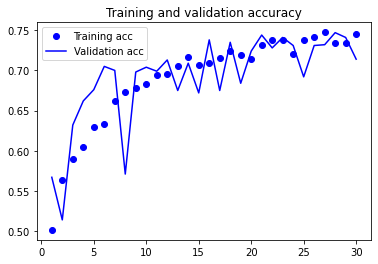

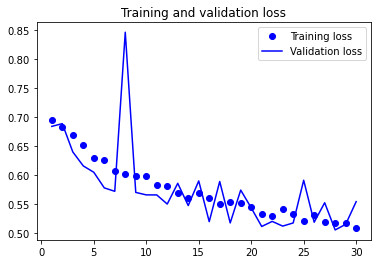

In [18]:
# Displaying curbes of loss and accuracy during training
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.predict()